# Module 02: A Box Model of Land-Atmosphere Carbon Balance

### 1. Introduction


In [1]:
import numpy as np
import matplotlib.pyplot as plt
    
                #initial condtions are listed in this kernal

M1i = 1100.0    #mass in gigatons 
M2i = 300.0

k12 = 0.075     #inverse years = or per year? = turn over time
k21 = 0.1

ti = 0.0
tf = 20.0       #time unit in years
dt = 1


In [2]:
                # notes how many steps are being taken 
                # starts at intial time(ti), then ends at the final time (tf)+change in time
t = np.arange(ti,tf+dt,dt)

Nt = t.size

print('t has '+str(Nt)+' time steps')

t has 21 time steps


In [3]:
                # Create a container to store the position of the random number 
                # at each time step. Note that this corresponds to an array of 
                # zeros that is Nt x 1.
M1 = np.zeros((Nt,))
M2 = np.zeros((Nt,))

In [4]:
                # This is the syntax for a Python for loop. It loops through all elements in
                # an array – in this case going from 0 to (Nt-1) – created with np.arange(Nt)
for i in np.arange(Nt):
    if (i==0):  # This is the syntax of a Python 'if' statement. If we're on the first step (i==0), 
                # then there was no previous step, so the position is 0. If (i>0) the previous location
                # was the value of x at step i-1

        M1[i] = M1i
        M2[i] = M2i
        
    else:
        dM1dt = k21*M2[i-1] - k12*M1[i-1]
        dM2dt = k12*M1[i-1] - k21*M2[i-1]
        
        M1[i] = M1[i-1] + dM1dt*dt
        M2[i] = M2[i-1] + dM2dt*dt

In [5]:
M1_anlt = (k21*(M1i+M2i))/(k12+k21) + (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t)
M2_anlt = (k12*(M1i+M2i))/(k12+k21) - (k12*M1i - k21*M2i)/(k12+k21)*np.exp(-(k12+k21)*t)

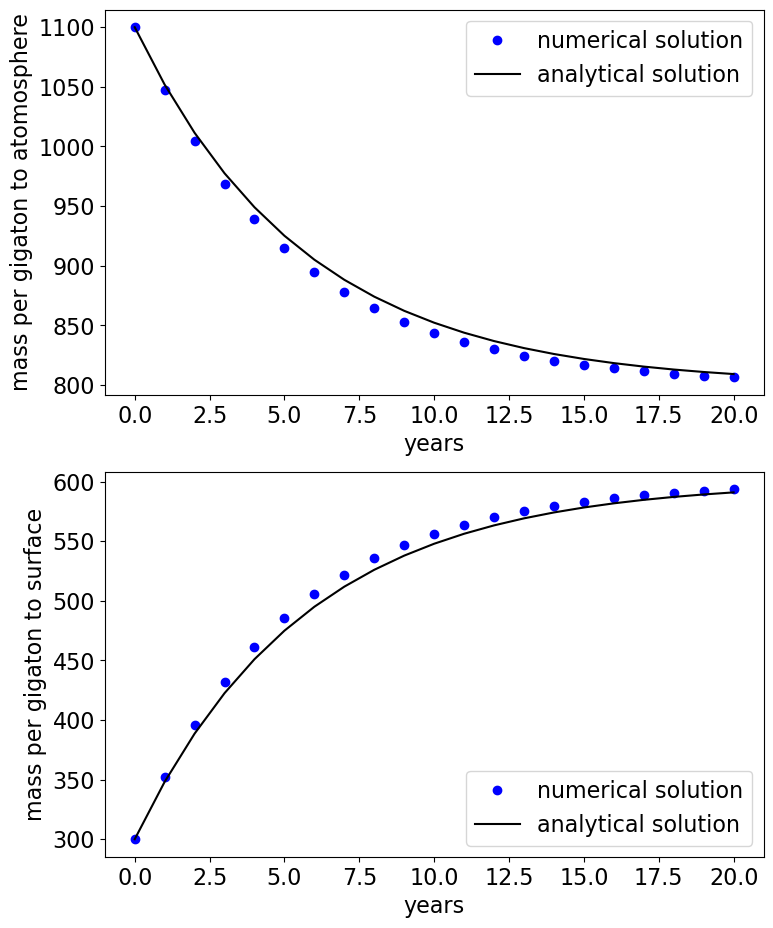

In [6]:
                #this kernal state how the above equations will be presented 
plt.figure(figsize=(8.5,11))
plt.rcParams.update({'font.size': 16})
plt.title('carbon exchange bewteen surface and atomosphere')

plt.subplot(2,1,1)
plt.plot(t,M1,'bo', label='numerical solution')
plt.plot(t,M1_anlt,'k-', label='analytical solution')
plt.xlabel('years')
plt.ylabel('mass per gigaton to atomosphere')
plt.legend()

plt.subplot(2,1,2)
plt.plot(t,M2,'bo', label='numerical solution')
plt.plot(t,M2_anlt,'k-', label='analytical solution')
plt.xlabel('years')
plt.ylabel('mass per gigaton to surface')
plt.legend()

plt.show()